In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack

In [2]:
#class_names= label_names
#train = train_data
#test = test_data
label_names = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

train_data = pd.read_csv('/Users/dixitapatodiya/Library/Mobile Documents/com~apple~CloudDocs/MyDrive/SJSU/257/Project/train.csv').fillna(' ')
test_data = pd.read_csv('/Users/dixitapatodiya/Library/Mobile Documents/com~apple~CloudDocs/MyDrive/SJSU/257/Project/test.csv').fillna(' ')
#train_text =train, test_text=test
train = train_data['comment_text']
test = test_data['comment_text']
#all_text = pd.concat([train, test])

In [3]:
print("Train data size: ",train_data.shape)
print("Test data size: ",test_data.shape)

('Train data size: ', (159571, 8))
('Test data size: ', (153164, 2))


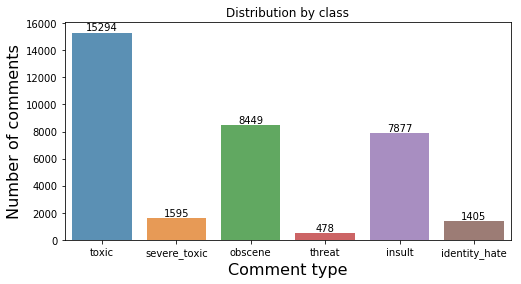

In [4]:
x=train_data.iloc[:,2:].sum()
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Distribution by class")
plt.ylabel("Number of comments", fontsize=16)
plt.xlabel('Comment type', fontsize=16)

rec_bar = ax.patches
features = x.values
for rec, feature in zip(rec_bar, features):
    height = rec.get_height()
    ax.text(rec.get_x() + rec.get_width()/2, height + 5, feature, ha='center', va='bottom')

plt.show()

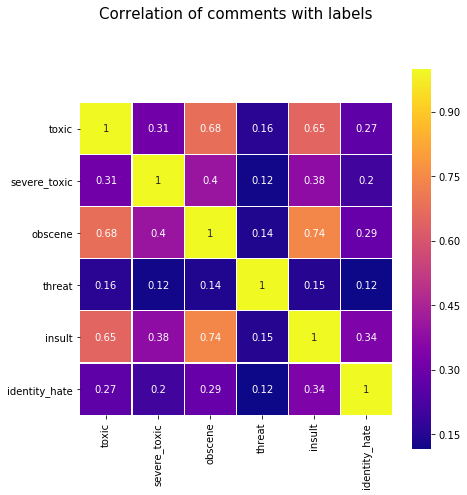

In [5]:
data_plot=train_data[label_names]
colormap = plt.cm.plasma
plt.figure(figsize=(7,7))
plt.title('Correlation of comments with labels',y=1.25,size=15)
sns.heatmap(data_plot.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,
           linecolor='white',annot=True)

In [6]:
word_to_vector = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features=30000)
word_to_vector.fit(train)
#train_word_features = train_wfeatures word_vectorizer= word_to_vector
train_wfeatures = word_to_vector.transform(train)
test_wfeatures = word_to_vector.transform(test)


In [7]:
#char_vectorizer = char_to_vector train_char_features = train_cfeatures 
char_to_vector = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    stop_words='english',
    ngram_range=(3,8),
    max_features=50000)
char_to_vector.fit(train)
train_cfeatures = char_to_vector.transform(train)
test_cfeatures = char_to_vector.transform(test)

In [8]:
#tarin_features=train_instances 
train_instances = hstack([train_cfeatures, train_wfeatures])
test_instances = hstack([test_cfeatures, test_wfeatures])

In [12]:
#submission = output cv_score=validation_score #tarin_target=target_data
scores = []
output = pd.DataFrame.from_dict({'id': test_data['id']})
for label_name in label_names:
    target_data = train_data[label_name]
    classifier = LogisticRegression(C=0.01, solver='sag')

    lr_validation_score = np.mean(cross_val_score(classifier, train_instances, target_data, cv=5, scoring='roc_auc'))
    scores.append(lr_validation_score)
    print('Validation score of label {} is {}'.format(label_name, lr_validation_score))

    classifier.fit(train_instances, target_data)
    output[label_name] = classifier.predict_proba(test_instances)[:, 1]


Validation score of label toxic is 0.948538501829
Validation score of label severe_toxic is 0.985445363635
Validation score of label obscene is 0.972362318696
Validation score of label threat is 0.979726269372
Validation score of label insult is 0.966198171369
Validation score of label identity_hate is 0.960724566786


In [2]:
print('Average validation score is {}'.format(np.mean(scores)))

NameError: name 'scores' is not defined

In [63]:
output.to_csv('257.csv', index=False)

In [64]:
submission_data = pd.read_csv('257.csv')


In [ ]:
# importing necessary libraries
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
 

from sklearn.neighbors import KNeighborsClassifier
output1 = pd.DataFrame.from_dict({'id': test_data['id']})
for label_name in label_names:
    target_data = train_data[label_name]
    knn = KNeighborsClassifier(n_neighbors = 7).fit(train_instances, target_data)
    output1[label_name] = knn.predict_proba(test_instances)[:, 1]

In [ ]:
#print('Average validation score is {}'.format(np.mean(kn_scores)))

In [78]:
output1.to_csv('knn2_257.csv', index=False)

In [9]:
#submission = output cv_score=validation_score #tarin_target=target_data
from numpy import loadtxt
from xgboost import XGBClassifier
#xg_scores = []
xg_output = pd.DataFrame.from_dict({'id': test_data['id']})
for label_name in label_names:
    model = XGBClassifier()
    target_data = train_data[label_name]
   
    #xg_validation_score = np.mean(cross_val_score(model, train_instances, target_data, cv=3, scoring='roc_auc'))
    #xg_scores.append(xg_validation_score)
    #print('Validation score of label {} is {}'.format(label_name, xg_validation_score))

    model.fit(train_instances, target_data)
    xg_output[label_name] = model.predict_proba(test_instances)[:, 1]



In [ ]:
#print('Average validation score is {}'.format(np.mean(xg_scores)))

In [18]:
xg_output.to_csv('submissionxg_257.csv', index=False)

In [16]:
print(xg_output[0:10])

                 id     toxic  severe_toxic   obscene    threat    insult  \
0  00001cee341fdb12  0.994926      0.355325  0.993002  0.065549  0.920188   
1  0000247867823ef7  0.044428      0.001807  0.013524  0.000757  0.016126   
2  00013b17ad220c46  0.068305      0.004000  0.019928  0.000980  0.022933   
3  00017563c3f7919a  0.023328      0.000958  0.008896  0.000618  0.013688   
4  00017695ad8997eb  0.059241      0.004000  0.017654  0.000850  0.020197   
5  0001ea8717f6de06  0.033704      0.001736  0.015215  0.001003  0.024184   
6  00024115d4cbde0f  0.021393      0.000853  0.012273  0.000752  0.013359   
7  000247e83dcc1211  0.060938      0.002064  0.015750  0.001007  0.018634   
8  00025358d4737918  0.040429      0.003188  0.018056  0.000514  0.027804   
9  00026d1092fe71cc  0.048035      0.001357  0.011892  0.000737  0.021291   

   identity_hate  
0       0.174495  
1       0.003865  
2       0.004520  
3       0.002235  
4       0.003135  
5       0.003640  
6       0.003015  


In [11]:
#submission = output cv_score=validation_score #tarin_target=target_data
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
ran_scores = []
ran_output = pd.DataFrame.from_dict({'id': test_data['id']})
for label_name in label_names:
    ran_clf = RandomForestClassifier(n_estimators=10)
    target_data = train_data[label_name]
   
   # ran_validation_score = np.mean(cross_val_score(ran_clf, train_instances, target_data, cv=3, scoring='roc_auc'))
    #ran_scores.append(ran_validation_score)
   # print('Validation score of label {} is {}'.format(label_name, ran_validation_score))

    ran_clf.fit(train_instances, target_data)
    ran_output[label_name] = ran_clf.predict_proba(test_instances)[:, 1]



In [19]:
ran_output.to_csv('submissionran_257.csv', index=False)

In [17]:
print(ran_output[0:10])

                 id  toxic  severe_toxic  obscene  threat  insult  \
0  00001cee341fdb12    0.9           0.1      0.5     0.0     0.8   
1  0000247867823ef7    0.0           0.0      0.0     0.0     0.0   
2  00013b17ad220c46    0.0           0.0      0.0     0.0     0.0   
3  00017563c3f7919a    0.1           0.0      0.0     0.0     0.0   
4  00017695ad8997eb    0.0           0.0      0.0     0.0     0.0   
5  0001ea8717f6de06    0.3           0.0      0.0     0.0     0.0   
6  00024115d4cbde0f    0.0           0.0      0.0     0.0     0.0   
7  000247e83dcc1211    0.4           0.0      0.0     0.0     0.0   
8  00025358d4737918    0.0           0.0      0.0     0.0     0.0   
9  00026d1092fe71cc    0.0           0.0      0.0     0.0     0.0   

   identity_hate  
0            0.1  
1            0.0  
2            0.0  
3            0.0  
4            0.0  
5            0.0  
6            0.0  
7            0.0  
8            0.0  
9            0.0  
